# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 
1.探索分析会对数据整体有一个初步的认知，包括数据量，重复值、缺失值分布，数据类型，字段情况等等；
2.对数据进行清理是非常重要的步骤，对后续的可视化和建模来说，这个预处理步骤都是不可或缺的；
3.探索分析可以帮助挑选合适的特征，为建模打好2基础。

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df0.shape

(22699, 18)

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df0.isnull().sum()
# 没有缺失值

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
# 清除重复值
df0.drop_duplicates(inplace = True)

Use `.describe()`.

In [7]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [8]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2b. Convert pickup & dropoff columns to datetime


In [9]:
# 这里由于时间不是标准的时间格式，所以做一下转化处理
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format="%m/%d/%Y %I:%M:%S %p")

In [10]:
# Check the format of the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [11]:
# 原数据中只有上车和下车数据，这两者不太好直接放入回归模型中，所以转化为持续时间这样的连续数据
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']

df0['duration'] = df0['duration'].dt.total_seconds() / 60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [12]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

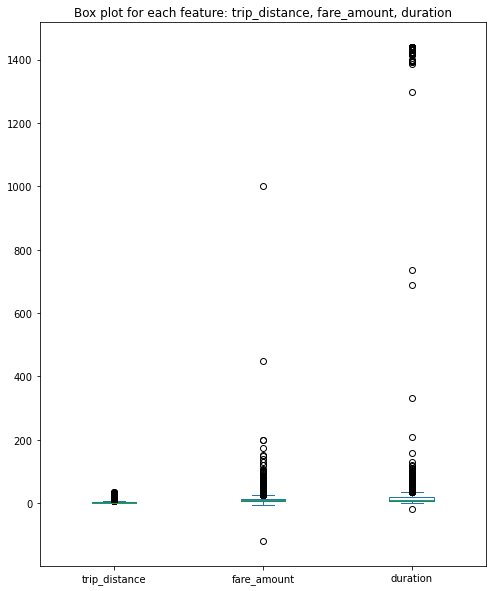

In [13]:
### YOUR CODE HERE ###
df0[['trip_distance','fare_amount','duration']].plot(kind='box', figsize=(8, 10))
plt.title('Box plot for each feature: trip_distance, fare_amount, duration')

plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

==> ENTER YOUR RESPONSE HERE

1.三个变量都存在部分异常值，不过需要具体结合实际分析；
2.trip_distance列在实际情况中，很可能不存在异常值，因为偶尔有远距离出行的出租车用户也是合理的；
3.0值应该是有意义的，意味着用户可能下单后取消了订单，但是负值应该是无意义的。

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
df1 = df0.sort_values(by='trip_distance').drop_duplicates(subset='trip_distance')
print(df1.head(10))
# 可以看到行程距离为0绝大多数是非常短的距离四舍五入导致的，有小部分是0，且出发地和目的地并不同，推测应该是乘客取消了订单，但是支付了车费
# 这样看来，这部分0值不会成为问题，它们是真实数据中的一部分，下面可以看看这部分数据占数据集中的比例

       Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
22026    63642923         1  2017-07-27 07:44:24   2017-07-27 07:44:24   
5501     67271410         2  2017-08-08 23:28:54   2017-08-08 23:29:00   
16827    37020205         2  2017-05-02 00:18:59   2017-05-02 00:19:02   
21088    68563779         2  2017-08-13 16:09:35   2017-08-13 16:10:56   
13517    89195982         2  2017-10-22 17:36:59   2017-10-22 17:41:06   
10146    69289782         2  2017-08-16 14:54:35   2017-08-16 14:59:10   
14373    93203790         2  2017-11-04 02:12:11   2017-11-04 02:13:03   
922      70604386         2  2017-08-21 11:23:01   2017-08-21 11:24:46   
22523    34683663         2  2017-04-26 19:03:15   2017-04-26 19:03:38   
22035   104619808         2  2017-12-10 12:20:19   2017-12-10 12:20:56   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
22026                1           0.00           1                  N   
5501                 2           0.01    

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
### YOUR CODE HERE ###
zero_distance_count = len(df0[df0['trip_distance'] == 0])
print("行程距离为零的行程数量:", zero_distance_count)
# 0值占比148/22699约等于0.65%，占比非常小，所以可以保留

行程距离为零的行程数量: 148


#### `fare_amount` outliers

In [16]:
### YOUR CODE HERE ###
df0['fare_amount'].describe()
# 可以看到最小值是负值，在实际中应该是不存在司机想乘客付钱的情况
# 最大值是999

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [17]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [18]:
### YOUR CODE HERE ###
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
'''
### YOUR CODE HERE ###
# Reassign minimum to zero
### YOUR CODE HERE ###
Q1 = df0['fare_amount'].quantile(0.25)
Q3 = df0['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
# Calculate upper threshold
### YOUR CODE HERE ###
upper_bound = Q3 + 6 * IQR
# Reassign values > threshold to threshold
### YOUR CODE HERE ###
df0['fare_amount'] = df0['fare_amount'].apply(lambda x: upper_bound if (x > upper_bound) else x)
# 这里使用了75%分位+6倍的IQR作为上届，尽可能的包含了大部分值，拒绝部分极端异常的值

In [19]:
df0['fare_amount'].describe()
# 从描述性统计可以看到清理后，最大值由999变为了62.5

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

#### `duration` outliers


In [20]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe()
# duration列和fare_amount列的异常值情况类似

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [21]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0.loc[df0['duration'] < 0, 'duration'] = 0

In [22]:
# Impute the high outliers
### YOUR CODE HERE ###
Q1 = df0['duration'].quantile(0.25)
Q3 = df0['duration'].quantile(0.75)
IQR = Q3 - Q1
# Calculate upper threshold
### YOUR CODE HERE ###
upper_bound = Q3 + 6 * IQR
# Reassign values > threshold to threshold
### YOUR CODE HERE ###
df0['duration'] = df0['duration'].apply(lambda x: upper_bound if (x > upper_bound) else x)

In [23]:
df0['duration'].describe()
# 经过处理后，上届由之前的1439.55变为88.78

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [24]:
df0.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000


In [25]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str)  + ' ' + df0['DOLocationID'].astype(str) 

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [26]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()
print(grouped)

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4172, dtype: float64


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [28]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
trip_distance = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = trip_distance

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [29]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['pickup_dropoff']
# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df0['mean_distance']

0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [30]:
### YOUR CODE HERE ###
grouped2 = df0.groupby('pickup_dropoff')['duration'].mean()
grouped2_dict = grouped2.to_dict()
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped2_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df0['mean_duration']

0        22.847222
1        24.470370
2         7.250000
3        30.250000
4        14.616667
           ...    
22694     8.594643
22695    59.560417
22696     6.609091
22697    16.650000
22698     9.405556
Name: mean_duration, Length: 22699, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [31]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day'] = df0['tpep_pickup_datetime'].dt.day
# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.month

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [32]:
df0.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,25,3
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,11,4
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,15,12


In [33]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
# 判断是否为工作日（周一到周五）
df0['is_weekday'] = df0['tpep_pickup_datetime'].dt.weekday < 5

# 提取小时
df0['hour'] = df0['tpep_pickup_datetime'].dt.hour
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
# 判断是否在早上6:00 - 10:00或下午16:00 - 20:00
df0['is_peak_hour'] = ((df0['hour'] >= 6) & (df0['hour'] < 10)) | ((df0['hour'] >= 16) & (df0['hour'] < 20))

In [34]:
### YOUR CODE HERE ###
# 构建rush_hour列
df0['rush_hour'] = df0['is_weekday'] & df0['is_peak_hour']
df0['rush_hour'] = df0['rush_hour'].astype(int)

In [35]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
print(df0['rush_hour'])

0        0
1        0
2        1
3        0
4        0
        ..
22694    1
22695    0
22696    0
22697    0
22698    0
Name: rush_hour, Length: 22699, dtype: int64


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

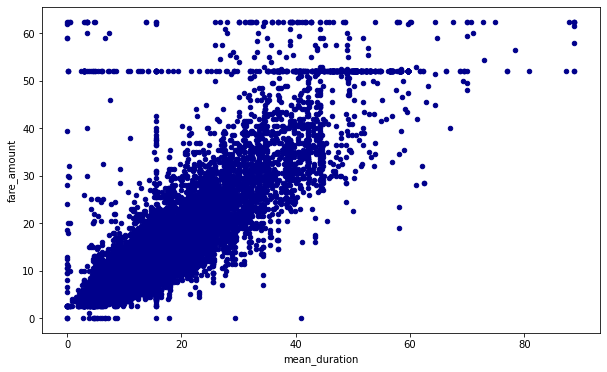

In [36]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
df0.plot(kind='scatter', x='mean_duration', y='fare_amount', figsize=(10, 6), color='darkblue')

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [37]:
### YOUR CODE HERE ###
fare_amount_around_52 = df0[(df0['fare_amount'] >= 52) & (df0['fare_amount'] <= 53)]
# 取出这部分的前30个值
top_30_values = fare_amount_around_52.head(30)
print(top_30_values)

      Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11      18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
110     47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
161     95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
242     67332929         2  2017-08-09 08:32:09   2017-08-09 09:31:11   
247    103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
379     80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388     16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406     55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
449     65900029         2  2017-08-03 22:47:14   2017-08-03 23:32:41   
468     80904240         2  2017-09-26 13:48:26   2017-09-26 14:31:17   
520     33706214         2  2017-04-23 21:34:48   2017-04-23 22:46:23   
569     99259872         2  2017-11-22 21:31:32   2017-11-22 22:00:25   
572     61050418         2  2017-07-18 13:29:06   2

Examine the first 30 of these trips.

**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE
有很多的出发地id都是132，说明这里有可能是一个特殊的地区，导致从这里出发的出租车，有相同的费用

In [38]:
# Set pandas to display all columns
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [39]:
### YOUR CODE HERE ###
df = df0[['passenger_count','trip_distance','payment_type','duration','mean_distance','mean_duration','day','month','hour','rush_hour','fare_amount']]

In [39]:
### YOUR CODE HERE ###
df.head()

,passenger_count,trip_distance,payment_type,duration,mean_distance,mean_duration,day,month,hour,rush_hour,fare_amount
0,6,3.34,1,14.066667,3.521667,22.847222,25,3,8,0,13.0
1,1,1.80,1,26.500000,3.108889,24.470370,11,4,14,0,16.0
2,1,1.00,1,7.200000,0.881429,7.250000,15,12,7,1,6.5
3,1,3.70,1,30.250000,3.700000,30.250000,7,5,13,0,20.5
4,1,4.37,2,16.716667,4.435000,14.616667,15,4,23,0,16.5


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

<Figure size 720x576 with 0 Axes>

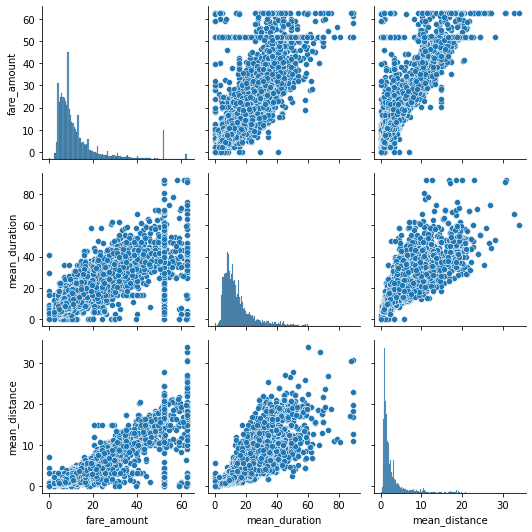

In [41]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
variables = ['fare_amount', 'mean_duration', 'mean_distance']
df_subset = df[variables]

plt.figure(figsize=(10, 8))
sns.pairplot(df_subset)

plt.tight_layout()
plt.show()

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [41]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df.corr()

,passenger_count,trip_distance,payment_type,duration,mean_distance,mean_duration,day,month,hour,rush_hour,fare_amount
passenger_count,1.000000,0.016496,0.016178,0.016757,0.013428,0.015852,-0.000636,-0.002891,0.009361,-0.022035,0.014942
trip_distance,0.016496,1.000000,-0.044716,0.759608,0.974220,0.852310,-0.004067,0.005077,-0.009338,-0.039352,0.924626
payment_type,0.016178,-0.044716,1.000000,-0.038604,-0.044495,-0.054298,0.002941,0.003398,-0.015803,-0.046697,-0.049516
duration,0.016757,0.759608,-0.038604,1.000000,0.738210,0.843800,-0.005394,0.033803,0.046934,0.023310,0.831036
mean_distance,0.013428,0.974220,-0.044495,0.738210,1.000000,0.874864,-0.004377,0.008143,-0.010776,-0.039725,0.910185
mean_duration,0.015852,0.852310,-0.054298,0.843800,0.874864,1.000000,-0.003276,0.015447,0.019954,-0.021583,0.859105
day,-0.000636,-0.004067,0.002941,-0.005394,-0.004377,-0.003276,1.000000,0.000425,0.006257,0.004414,-0.008506
month,-0.002891,0.005077,0.003398,0.033803,0.008143,0.015447,0.000425,1.000000,0.000307,-0.007503,0.014116
hour,0.009361,-0.009338,-0.015803,0.046934,-0.010776,0.019954,0.006257,0.000307,1.000000,-0.040670,0.006062
rush_hour,-0.022035,-0.039352,-0.046697,0.023310,-0.039725,-0.021583,0.004414,-0.007503,-0.040670,1.000000,-0.020075


Visualize a correlation heatmap of the data.

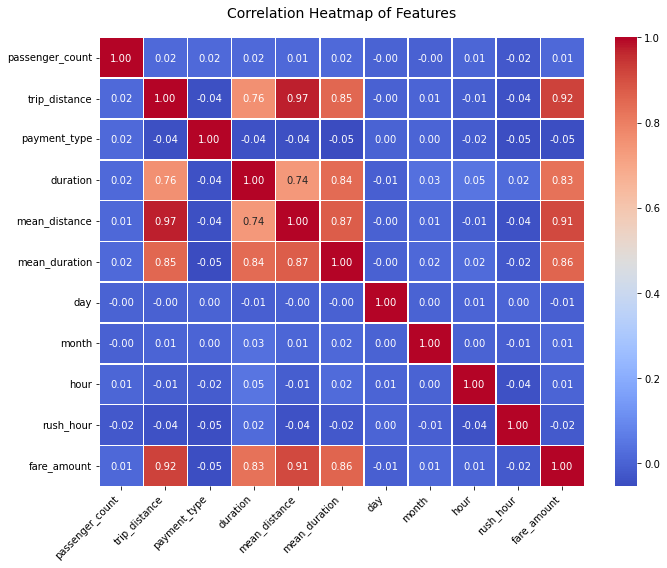

In [42]:
# Create correlation heatmap
### YOUR CODE HERE ###
corr_matrix = df.corr()

# 设置图形样式
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # 显示数值
    cmap='coolwarm',     # 颜色映射（红-高相关，蓝-低相关）
    fmt=".2f",           # 数值格式（保留两位小数）
    linewidths=0.5,      # 网格线宽度
    annot_kws={"size": 10}  # 数值字体大小
)

# 设置标题和坐标轴标签
plt.title("Correlation Heatmap of Features", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)  # X轴标签旋转45度
plt.yticks(rotation=0, fontsize=10)              # Y轴标签保持垂直
plt.tight_layout()                               # 自动调整布局
plt.show()

In [42]:
df = df0[['passenger_count','mean_duration', 'mean_distance','payment_type','rush_hour','fare_amount']]
df.head()

,passenger_count,mean_duration,mean_distance,payment_type,rush_hour,fare_amount
0,6,22.847222,3.521667,1,0,13.0
1,1,24.470370,3.108889,1,0,16.0
2,1,7.250000,0.881429,1,1,6.5
3,1,30.250000,3.700000,1,0,20.5
4,1,14.616667,4.435000,2,0,16.5


**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

In [43]:
# 想确定不同乘客人数的平均车费是否存在差别，可以使用方差分析，如果p值小于0.05，则拒绝原假设，将乘客人数纳入特征之一
df['passenger_count'].unique()

array([6, 1, 2, 4, 5, 3, 0])

In [44]:
from scipy.stats import f_oneway

In [45]:
# 按 passenger_count 分组并计算 fare_amount 的均值
grouped_data = df.groupby('passenger_count')['fare_amount'].mean()
print("\nMean Fare Amount by Passenger Count:")
print(grouped_data)


Mean Fare Amount by Passenger Count:
passenger_count
0    13.712121
1    12.678849
2    13.714887
3    13.422875
4    13.512110
5    12.930446
6    12.878788
Name: fare_amount, dtype: float64


In [46]:
# 提取每个组的数据
groups = [df[df['passenger_count'] == i]['fare_amount'] for i in range(7)]

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*groups)

# 打印结果
print("\nF-statistic:", f_statistic)
print("P-value:", p_value)

# range(7) 会生成一个包含 0 到 6 的整数序列。
# 对于序列中的每个整数 i，df['passenger_count'] == i 会生成一个布尔型的 Series，其元素为 True 或者 False，True 表示对应行的 passenger_count 等于 i。
# df[df['passenger_count'] == i] 会筛选出 passenger_count 等于 i 的所有行。
# df[df['passenger_count'] == i]['fare_amount'] 会从筛选出的行里提取 fare_amount 列的数据。
# 最终，groups 是一个包含 7 个 Series 的列表，每个 Series 都代表一个 passenger_count 组的 fare_amount 数据。


F-statistic: 5.160908010147761
P-value: 2.5946023174046793e-05


In [47]:
# 解释结果
alpha = 0.05
if p_value < alpha:
    print("\n拒绝原假设：不同乘客数量的平均费用存在显著差异。")
else:
    print("\n不能拒绝原假设：不同乘客数量的平均费用不存在显著差异。")


拒绝原假设：不同乘客数量的平均费用存在显著差异。


In [50]:
# 同样的，也可以使用方差分析来确定不同支付方式的平均车费是否存在差异
grouped_data1 = df.groupby('payment_type')['fare_amount'].mean()
print("\nMean Fare Amount by Payment type:")
print(grouped_data1)


Mean Fare Amount by Payment type:
payment_type
1    13.279181
2    12.105683
3    12.343140
4    12.989130
Name: fare_amount, dtype: float64


In [51]:
groups = [df[df['payment_type'] == i]['fare_amount'] for i in range(1, 5)]

# 进行单因素方差分析
f_statistic, p_value = f_oneway(*groups)

# 打印结果
print("\nF-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 20.504698336750046
P-value: 2.905379609811774e-13


In [52]:
alpha = 0.05
if p_value < alpha:
    print("\n拒绝原假设：不同支付方式的平均车费存在显著差异。")
else:
    print("\n不能拒绝原假设：不同支付方式的平均车费不存在显著差异。")


拒绝原假设：不同支付方式的平均车费存在显著差异。


In [53]:
# 接下来对是否高峰时段的车费差异，我们不能再使用方差分析，而是应该使用独立样本t检验，方差分析的变量数量一单少于三个，就会变得不准确
from scipy.stats import ttest_ind

In [54]:
grouped_data = df.groupby('rush_hour')['fare_amount'].mean()
print("\nMean Fare Amount by Rush Hour:")
print(grouped_data)


Mean Fare Amount by Rush Hour:
rush_hour
0    13.035376
1    12.572151
Name: fare_amount, dtype: float64


In [55]:
# 提取每个组的数据
non_rush_hour_fares = df[df['rush_hour'] == 0]['fare_amount']
rush_hour_fares = df[df['rush_hour'] == 1]['fare_amount']

# 进行独立样本 t 检验
t_statistic, p_value = ttest_ind(non_rush_hour_fares, rush_hour_fares)

# 打印结果
print("\nT-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 3.0250842283134305
P-value: 0.0024884196266272422


In [56]:
# 解释结果
alpha = 0.05
if p_value < alpha:
    print("\n拒绝原假设：高峰时段和非高峰时段的平均车费存在显著差异。")
else:
    print("\n不能拒绝原假设：高峰时段和非高峰时段的平均车费不存在显著差异。")


拒绝原假设：高峰时段和非高峰时段的平均车费存在显著差异。


<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [57]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  22699 non-null  int64  
 1   mean_duration    22699 non-null  float64
 2   mean_distance    22699 non-null  float64
 3   payment_type     22699 non-null  int64  
 4   rush_hour        22699 non-null  int64  
 5   fare_amount      22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [58]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = df.drop(columns=['fare_amount'])

# Set y variable
y = df[['fare_amount']]

# Display first few rows
X.head()

,passenger_count,mean_duration,mean_distance,payment_type,rush_hour
0,6,22.847222,3.521667,1,0
1,1,24.470370,3.108889,1,0
2,1,7.250000,0.881429,1,1
3,1,30.250000,3.700000,1,0
4,1,14.616667,4.435000,2,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [60]:
# Convert VendorID to string
### YOUR CODE HERE ###
X = pd.get_dummies(X, columns=['passenger_count','payment_type'], drop_first=True)
# Get dummies
### YOUR CODE HERE ###
X.head() 

,mean_duration,mean_distance,rush_hour,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,payment_type_2,payment_type_3,payment_type_4
0,22.847222,3.521667,0,0,0,0,0,0,1,0,0,0
1,24.470370,3.108889,0,1,0,0,0,0,0,0,0,0
2,7.250000,0.881429,1,1,0,0,0,0,0,0,0,0
3,30.250000,3.700000,0,1,0,0,0,0,0,0,0,0
4,14.616667,4.435000,0,1,0,0,0,0,0,1,0,0


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [61]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [62]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.17616665  0.8694684  -0.64893329 ...  1.45532133 -0.07174811
  -0.04394475]
 [-0.69829589 -0.60011281  1.54099045 ... -0.68713347 -0.07174811
  -0.04394475]
 [-0.57301906 -0.47829156 -0.64893329 ... -0.68713347 -0.07174811
  -0.04394475]
 ...
 [-0.6788917  -0.45121122 -0.64893329 ...  1.45532133 -0.07174811
  -0.04394475]
 [-0.85743597 -0.58944763  1.54099045 ...  1.45532133 -0.07174811
  -0.04394475]
 [ 1.13212101  0.83673851 -0.64893329 ...  1.45532133 -0.07174811
  -0.04394475]]


### Fit the model

Instantiate your model and fit it to the training data.

In [63]:
# Fit your model to the training data
### YOUR CODE HERE ###
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
lm.intercept_
lm.coef_

array([[ 2.80473891e+00,  7.13867928e+00,  1.11364491e-01,
        -3.97885484e-01, -2.37716755e-01, -1.39580640e-01,
        -3.38916757e-03, -2.22661670e-01, -1.70748446e-01,
        -4.17908724e-02, -1.92544504e-02, -7.97923477e-02]])

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
r_sq = lm.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lm.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8400927368600133
R^2: 0.8400927368600133
MAE: 2.1871909402705985
MSE: 17.861888186298604
RMSE: 4.226332711263821


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [66]:
# Scale the X_test data
### YOUR CODE HERE ###
X_test_scaled = scaler.transform(X_test)

In [67]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
lm.fit(X_test_scaled, y_test)
lm.intercept_
lm.coef_

array([[ 2.83982823,  7.31900288,  0.2255916 , -0.60945683, -0.42595123,
        -0.15778595, -0.17394505, -0.25669038, -0.26391115, -0.01859125,
         0.07214573, -0.02835483]])

In [68]:
r_sq_test = lm.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lm.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8690592347770154
R^2: 0.8690592347770154
MAE: 2.110548461789587
MSE: 14.23936220745022
RMSE: 3.7735079445325432


**决定系数（Coefficient of determination）与 R 2值**

代码中Coefficient of determination和R^2的值均为 0.8690592347770154，保留两位小数后约为 0.87。这两个值本质上是相同的，都是用于衡量回归模型拟合优度的指标。

含义：R 2取值范围在 0 到 1 之间，越接近 1 表明模型对数据的拟合效果越好。这里的 0.87 意味着模型能够解释约 87% 的因变量（目标变量）的变异，也就是说，模型在解释数据的变化方面表现良好。不过，也有大约 13% 的变异无法由该模型解释，可能是由于未考虑到的变量、数据中的噪声或者模型本身的局限性等因素造成的。

**平均绝对误差（MAE, Mean Absolute Error）**

MAE的值为 2.110548461789587，保留两位小数后约为 2.11。

含义：MAE 衡量的是预测值与真实值之间绝对误差的平均值。它直观地反映了模型预测的平均偏离程度。在这个例子中，模型预测值与真实值之间平均相差约 2.11 个单位。MAE 越小，说明模型的预测越准确。

**均方误差（MSE, Mean Squared Error）**

MSE的值为 14.23936220745022，保留两位小数后约为 14.24。

含义：MSE 是预测值与真实值之间误差平方的平均值。由于对误差进行了平方操作，MSE 会放大较大误差的影响，因此对异常值比较敏感。MSE 越小，模型的性能越好。不过，MSE 的单位是因变量单位的平方，这使得它的实际含义不太直观。

**均方根误差（RMSE, Root Mean Squared Error）**

RMSE的值为 3.7735079445325432，保留两位小数后约为 3.77。

含义：RMSE 是 MSE 的平方根，其单位与因变量的单位相同，因此更具实际意义。它同样反映了模型预测值与真实值之间的平均误差，但由于对误差进行了平方和开方操作，RMSE 对较大误差的惩罚更为明显。在这个例子中，模型预测值与真实值之间平均相差约 3.77 个单位。与 MAE 相比，RMSE 更大，这可能意味着数据中存在一些较大的误差值。

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [69]:
# Create a `results` dataframe
### YOUR CODE HERE ###
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.283619,1.716381
18134,28.0,16.261885,11.738115
4655,5.5,6.646318,-1.146318
7378,15.5,16.206421,-0.706421
13914,9.5,10.378207,-0.878207


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

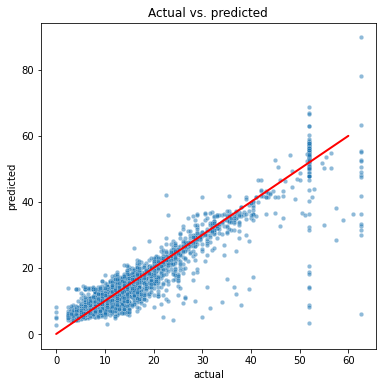

In [70]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

**整体拟合趋势**

图中红色直线代表 “预测值 = 实际值” 的理想状态。散点越贴近红线，说明预测值与实际值越接近。当前大部分散点分布在红线附近，尤其在实际值较低（如 0–40 区间）时，散点密集且贴近红线，表明模型在该区间的预测效果较好，能较准确捕捉实际值规律。

**高实际值区域的表现**

在实际值较高（如 40 以上）的区域，散点明显偏离红线，分布更分散，部分预测值与实际值差距较大。在建模过程中，我们已经注意到了这部分值的情况，说明模型对这部分值的预测能力较弱。

**离散程度与误差分布**

散点的离散程度反映预测误差。整体来看，散点虽围绕红线分布，但仍有一定离散性，与前期计算的 MAE、RMSE 结果呼应，说明模型存在固有误差。低实际值区域散点聚集性强，误差较小；高实际值区域散点分散，误差波动更大，进一步验证模型在不同数据区间的表现差异。

Visualize the distribution of the `residuals` using a histogram.

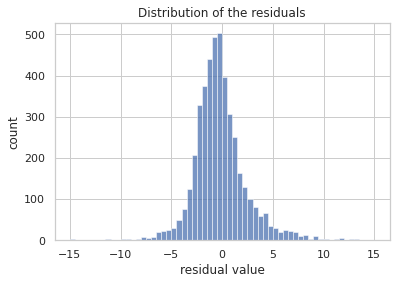

In [71]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

**残差正态性假设验证**

线性回归模型假设残差服从正态分布。图中残差分布呈现 “中间高、两边低” 的钟形趋势，大部分残差集中在 0 值附近，向两侧逐渐减少，近似符合正态分布特征。这表明模型基本满足线性回归的残差正态性假设，误差项的随机性较强，没有明显的系统性偏差。

**残差集中趋势**

残差在 0 值附近高频聚集，说明模型的预测值与实际值整体偏差较小。大量样本的残差接近 0，意味着模型对多数数据的预测较为精准，符合预期的 “预测值贴近实际值” 的目标。

**残差离散程度**

残差范围覆盖约 -15 到 15，虽存在一定波动，但结合高频区域集中在 0 附近可知：模型对大部分样本的预测误差可控，仅少数样本残差绝对值较大。这与此前 MAE、RMSE 反映的 “整体误差存在但可接受” 的结论一致，进一步说明模型在多数场景下表现稳定。

In [72]:
# Calculate residual mean
### YOUR CODE HERE ###
results['residual'].mean()

1.0906596233101759e-15

Create a scatterplot of `residuals` over `predicted`.

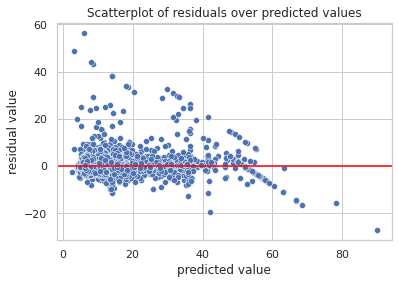

In [73]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

**同方差性检验**

理想情况：线性回归假设残差的方差恒定（同方差性），即残差在预测值的各个区间应均匀分布，无明显离散程度差异。
当前表现：在预测值较低（如 0–40 区间）时，残差集中在 0 附近，波动较小；但随着预测值升高（如 40 以上），残差的波动范围扩大（如出现 -20 到 40 的残差）。这暗示模型可能存在异方差性，即残差方差随预测值变化而改变，违背了线性回归的同方差假设，可能影响模型参数估计的有效性。

**残差随机性判断**

理想情况：残差应完全随机分布，无任何规律或趋势，表明模型已充分提取数据中的信息。
当前表现：残差虽整体围绕 0 线分布，但在预测值较高区域（如 60–80），残差呈现一定的下降趋势（部分残差向负方向偏移）。这可能说明模型对高预测值样本的拟合存在缺陷，例如遗漏了数据中的非线性关系，或未纳入某些对高值样本影响显著的特征，导致模型在该区域的预测偏差呈现规律性。

**模型整体拟合有效性**

图中大部分残差集中在 0 线附近，说明模型对多数样本的预测误差较小，整体拟合效果有一定合理性。但结合高预测值区域的残差异常分布，表明模型仍有优化空间，需进一步排查特征工程（如是否遗漏关键变量）、模型形式（如是否需引入非线性项）或数据处理环节（如高值样本是否需特殊处理）。

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [74]:
# Output the model's coefficients
lm.coef_

array([[ 2.83982823,  7.31900288,  0.2255916 , -0.60945683, -0.42595123,
        -0.15778595, -0.17394505, -0.25669038, -0.26391115, -0.01859125,
         0.07214573, -0.02835483]])

What do these coefficients mean? How should they be interpreted?

==> ENTER YOUR RESPONSE HERE 
这些系数代表着，随着乘客数量，运行距离，运行时长，是否为高峰时段和支付方式的变化，运行费用的随之变化情况。从系数可以看出最显著的影响是运行距离，其次是运行时间，这两者是最主要的，其次是支付方式，是否为高峰时间以及乘客数量。

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 
我们对出租车运行数据做了清洗，随后在众多字段中挑选了合适的字段，进行特征工程，最后选择了运行时间、运行距离、支付方式和乘客数量，构造了是否为高峰时间以及平均距离和时间，但是思考过后舍弃了平均距离和时间。
通过建模，我们发现对费用影响最显著的是运行距离和时间

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 